In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Bidirectional
from sklearn.model_selection import train_test_split
from tensorflow import keras

In [2]:
df = pd.read_csv('C:\\Users\\FRANK\\Documents\\Github\\FreeWaysSimulated\\operation\\models\\csvs\\raw-data-2020-2029.csv')
df.head()


,_id,count_id,count_date,location_id,location,lng,lat,centreline_type,centreline_id,px,...,ex_peds,wx_peds,nx_bike,sx_bike,ex_bike,wx_bike,nx_other,sx_other,ex_other,wx_other
0,1,39337,2020-01-08,13060,BROADVIEW AVE AT ERINDALE AVE,-79.358652,43.677521,2,13462138,NaN,...,60,0,4,0,0,0,0,0,0,0
1,2,39337,2020-01-08,13060,BROADVIEW AVE AT ERINDALE AVE,-79.358652,43.677521,2,13462138,NaN,...,54,0,3,0,0,0,0,0,0,0
2,3,39337,2020-01-08,13060,BROADVIEW AVE AT ERINDALE AVE,-79.358652,43.677521,2,13462138,NaN,...,86,0,2,0,0,0,0,0,0,0
3,4,39337,2020-01-08,13060,BROADVIEW AVE AT ERINDALE AVE,-79.358652,43.677521,2,13462138,NaN,...,105,0,2,1,0,0,0,0,0,0
4,5,39337,2020-01-08,13060,BROADVIEW AVE AT ERINDALE AVE,-79.358652,43.677521,2,13462138,NaN,...,104,0,1,2,0,0,0,0,0,0


In [3]:
# seleccionar cualquier interseccion dentro del dataset
intersection = df[df['location'] == 'YONGE ST AT CHAPLIN CRES & DAVISVILLE AVE (PX 47)']
intersection.shape

(768, 60)

In [4]:
intersection.describe()

,_id,count_id,location_id,lng,lat,centreline_type,centreline_id,px,sb_cars_r,sb_cars_t,...,ex_peds,wx_peds,nx_bike,sx_bike,ex_bike,wx_bike,nx_other,sx_other,ex_other,wx_other
count,768.000000,768.000000,768.0,7.680000e+02,768.000000,768.0,768.0,768.0,768.000000,768.000000,...,768.000000,768.000000,768.00000,768.000000,768.000000,768.000000,768.0,768.0,768.0,768.0
mean,78519.166667,44587.083333,4654.0,-7.939664e+01,43.698301,2.0,13458407.0,47.0,11.527344,98.083333,...,93.933594,67.658854,4.52474,3.709635,0.677083,0.973958,0.0,0.0,0.0,0.0
std,37173.950469,2329.030232,0.0,1.422012e-14,0.000000,0.0,0.0,0.0,5.182891,23.158900,...,38.343123,26.949337,3.74471,3.851928,0.979528,1.278383,0.0,0.0,0.0,0.0
min,32772.000000,41715.000000,4654.0,-7.939664e+01,43.698301,2.0,13458407.0,47.0,0.000000,34.000000,...,9.000000,6.000000,0.00000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0
25%,43507.750000,42396.500000,4654.0,-7.939664e+01,43.698301,2.0,13458407.0,47.0,8.000000,85.000000,...,66.000000,47.000000,2.00000,1.000000,0.000000,0.000000,0.0,0.0,0.0,0.0
50%,89923.500000,45304.000000,4654.0,-7.939664e+01,43.698301,2.0,13458407.0,47.0,11.000000,96.000000,...,93.000000,63.000000,4.00000,2.500000,0.000000,1.000000,0.0,0.0,0.0,0.0
75%,112099.250000,46691.500000,4654.0,-7.939664e+01,43.698301,2.0,13458407.0,47.0,15.000000,108.000000,...,120.000000,83.000000,6.00000,5.000000,1.000000,2.000000,0.0,0.0,0.0,0.0
max,150319.000000,49079.000000,4654.0,-7.939664e+01,43.698301,2.0,13458407.0,47.0,31.000000,179.000000,...,235.000000,157.000000,43.00000,25.000000,6.000000,9.000000,0.0,0.0,0.0,0.0


In [5]:
intersection.columns

Index(['_id', 'count_id', 'count_date', 'location_id', 'location', 'lng',
       'lat', 'centreline_type', 'centreline_id', 'px', 'time_start',
       'time_end', 'sb_cars_r', 'sb_cars_t', 'sb_cars_l', 'nb_cars_r',
       'nb_cars_t', 'nb_cars_l', 'wb_cars_r', 'wb_cars_t', 'wb_cars_l',
       'eb_cars_r', 'eb_cars_t', 'eb_cars_l', 'sb_truck_r', 'sb_truck_t',
       'sb_truck_l', 'nb_truck_r', 'nb_truck_t', 'nb_truck_l', 'wb_truck_r',
       'wb_truck_t', 'wb_truck_l', 'eb_truck_r', 'eb_truck_t', 'eb_truck_l',
       'sb_bus_r', 'sb_bus_t', 'sb_bus_l', 'nb_bus_r', 'nb_bus_t', 'nb_bus_l',
       'wb_bus_r', 'wb_bus_t', 'wb_bus_l', 'eb_bus_r', 'eb_bus_t', 'eb_bus_l',
       'nx_peds', 'sx_peds', 'ex_peds', 'wx_peds', 'nx_bike', 'sx_bike',
       'ex_bike', 'wx_bike', 'nx_other', 'sx_other', 'ex_other', 'wx_other'],
      dtype='object')

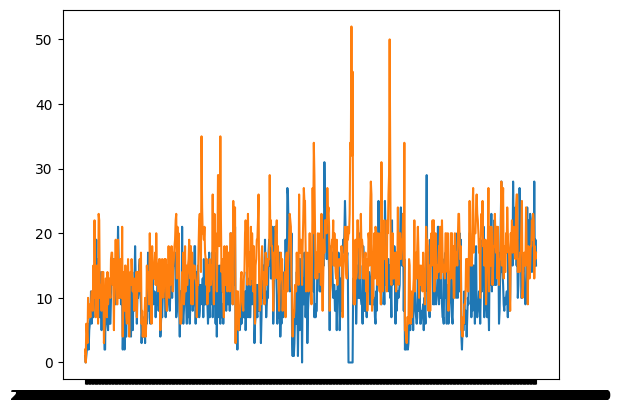

In [6]:
plt.plot(intersection['time_start'], intersection['sb_cars_r'])
plt.plot(intersection['time_start'], intersection['sb_cars_l'])

In [7]:
# seleccionar intersecciones relevantes con conteos de carros 
updated_intersection = pd.DataFrame()

updated_intersection['north_1'] = intersection['nb_cars_r'] + intersection['nb_truck_r'] + intersection['nb_bus_r']
updated_intersection['north_2'] = intersection['nb_cars_l'] + intersection['nb_truck_l'] + intersection['nb_bus_l']

updated_intersection['south_1'] = intersection['sb_cars_r'] + intersection['sb_truck_r'] + intersection['sb_bus_r']
updated_intersection['south_2'] = intersection['sb_cars_l'] + intersection['sb_truck_l'] + intersection['sb_bus_l']


updated_intersection['east_1'] = intersection['eb_cars_r'] + intersection['eb_truck_r'] + intersection['eb_bus_r']
updated_intersection['east_2'] = intersection['eb_cars_l'] + intersection['eb_truck_l'] + intersection['eb_bus_l']

updated_intersection['west_1'] = intersection['wb_cars_r'] + intersection['wb_truck_r'] + intersection['wb_bus_r']
updated_intersection['west_2'] = intersection['wb_cars_l'] + intersection['wb_truck_l'] + intersection['wb_bus_l']



In [8]:


# convertir formato de fecha
datetime_index = pd.date_range(start='2024-04-01 00:00:00', periods=len(updated_intersection), freq='15T')
updated_intersection.index = datetime_index


C:\Users\julio\AppData\Local\Temp\ipykernel_9020\1943901178.py:4: FutureWarning: 'T' is deprecated and will be removed in a future version, please use 'min' instead.
  datetime_index = pd.date_range(start='2024-04-01 00:00:00', periods=len(updated_intersection), freq='15T')


In [9]:
df = updated_intersection.copy()
df

,north_1,north_2,south_1,south_2,east_1,east_2,west_1,west_2
2024-04-01 00:00:00,2,8,1,2,14,3,5,5
2024-04-01 00:15:00,6,7,0,0,19,6,5,5
2024-04-01 00:30:00,3,11,1,6,9,1,4,2
2024-04-01 00:45:00,9,23,3,5,12,4,10,2
2024-04-01 01:00:00,8,12,5,3,13,3,6,5
...,...,...,...,...,...,...,...,...
2024-04-08 22:45:00,24,42,17,22,21,1,16,13
2024-04-08 23:00:00,29,51,29,13,24,2,17,13
2024-04-08 23:15:00,25,59,15,18,19,0,8,9
2024-04-08 23:30:00,30,44,19,16,11,0,13,11


In [10]:
df['hour'] = df.index.hour
df['minute'] = df.index.minute
df['day'] = df.index.weekday

In [11]:
df.head()

,north_1,north_2,south_1,south_2,east_1,east_2,west_1,west_2,hour,minute,day
2024-04-01 00:00:00,2,8,1,2,14,3,5,5,0,0,0
2024-04-01 00:15:00,6,7,0,0,19,6,5,5,0,15,0
2024-04-01 00:30:00,3,11,1,6,9,1,4,2,0,30,0
2024-04-01 00:45:00,9,23,3,5,12,4,10,2,0,45,0
2024-04-01 01:00:00,8,12,5,3,13,3,6,5,1,0,0


[]

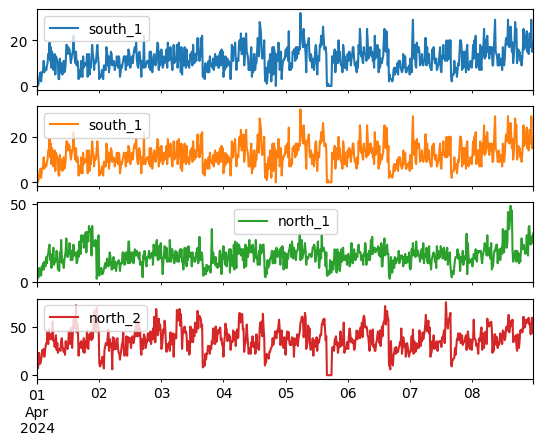

In [12]:
df[['south_1', 'south_1', 'north_1', 'north_2']].plot(subplots=True)
plt.plot()

In [13]:
input_features = df[['day', 'hour', 'minute']].values
traffic_counts = df[['north_1', 'north_2', 'south_1', 'south_2', 'east_1', 'east_2','west_1', 'west_2']].values

In [14]:
data_combined = np.hstack((input_features, traffic_counts))

In [15]:
def create_sequences(data, seq_length):
    X = []
    y = []
    for i in range(len(data) - seq_length):
        X.append(data[i:i + seq_length, :3])  # El imput es el dia hora y minuto
        y.append(data[i + seq_length, 3:])    # El output es la cantidad de vehiculos
    return np.array(X), np.array(y)

seq_length = 5
X, y = create_sequences(data_combined, seq_length)

In [16]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=False)

In [17]:
X_train[0]

array([[ 0,  0,  0],
       [ 0,  0, 15],
       [ 0,  0, 30],
       [ 0,  0, 45],
       [ 0,  1,  0]], dtype=int64)

In [18]:
y_train[0]

array([ 8, 12,  6, 10, 13,  3, 14,  2], dtype=int64)

In [19]:
model = Sequential()
model.add(LSTM(50, return_sequences=True, input_shape=(X_train.shape[1], X_train.shape[2])))
model.add(Bidirectional(LSTM(50)))
model.add(Dense(y_train.shape[1]))  

model.compile(optimizer='adam', loss='mse', metrics=['mae'])
model.summary()

c:\Users\julio\FreeWays\Env\Lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm (LSTM)                     │ (None, 5, 50)          │        10,800 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ bidirectional (Bidirectional)   │ (None, 100)            │        40,400 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 8)              │           808 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 52,008 (203.16 KB)

 Trainable params: 52,008 (203.16 KB)

 Non-trainable params: 0 (0.00 B)

In [20]:
history = model.fit(X_train, y_train, epochs=100, batch_size=32, validation_data=(X_test, y_test), verbose=2)

Epoch 1/100
20/20 - 3s - 141ms/step - loss: 393.5275 - mae: 16.2852 - val_loss: 377.9381 - val_mae: 15.9545
Epoch 2/100
20/20 - 0s - 5ms/step - loss: 285.4238 - mae: 13.3781 - val_loss: 248.2432 - val_mae: 12.3123
Epoch 3/100
20/20 - 0s - 4ms/step - loss: 187.0542 - mae: 10.2224 - val_loss: 175.0165 - val_mae: 9.7744
Epoch 4/100
20/20 - 0s - 4ms/step - loss: 138.0189 - mae: 8.3822 - val_loss: 136.6722 - val_mae: 8.3168
Epoch 5/100
20/20 - 0s - 4ms/step - loss: 110.5052 - mae: 7.2869 - val_loss: 112.4422 - val_mae: 7.3546
Epoch 6/100
20/20 - 0s - 4ms/step - loss: 92.1058 - mae: 6.5462 - val_loss: 95.0024 - val_mae: 6.6432
Epoch 7/100
20/20 - 0s - 4ms/step - loss: 79.2839 - mae: 6.0175 - val_loss: 82.8351 - val_mae: 6.1610
Epoch 8/100
20/20 - 0s - 4ms/step - loss: 70.4386 - mae: 5.6674 - val_loss: 74.0344 - val_mae: 5.8170
Epoch 9/100
20/20 - 0s - 4ms/step - loss: 64.0578 - mae: 5.4134 - val_loss: 67.4170 - val_mae: 5.5633
Epoch 10/100
20/20 - 0s - 4ms/step - loss: 59.3164 - mae: 5.2392 

In [21]:
loss = model.evaluate(X_test, y_test)
print("Test Loss:", loss)

5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 49.4514 - mae: 5.0081 
Test Loss: [49.5181884765625, 5.097352027893066]


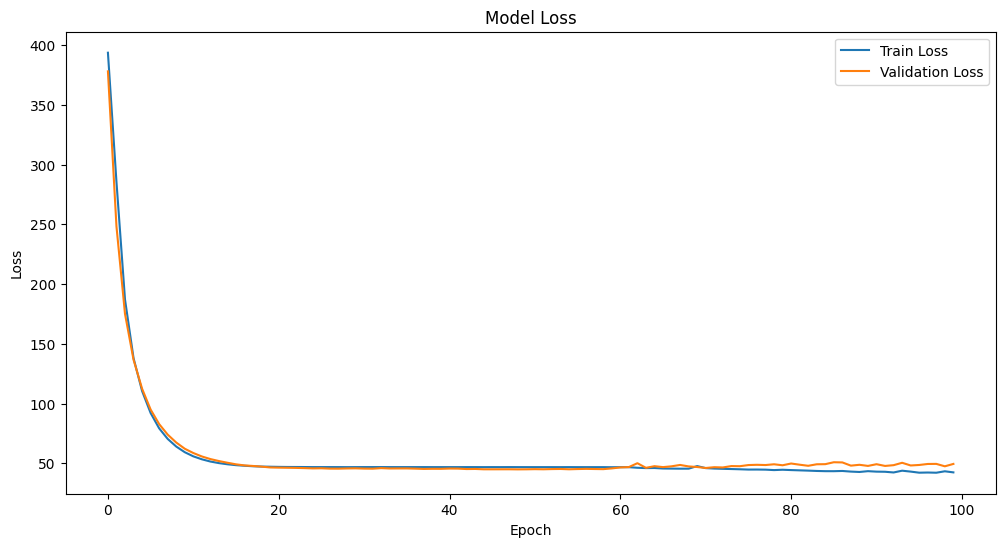

In [22]:
plt.figure(figsize=(12, 6))
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(loc='upper right')
plt.show()

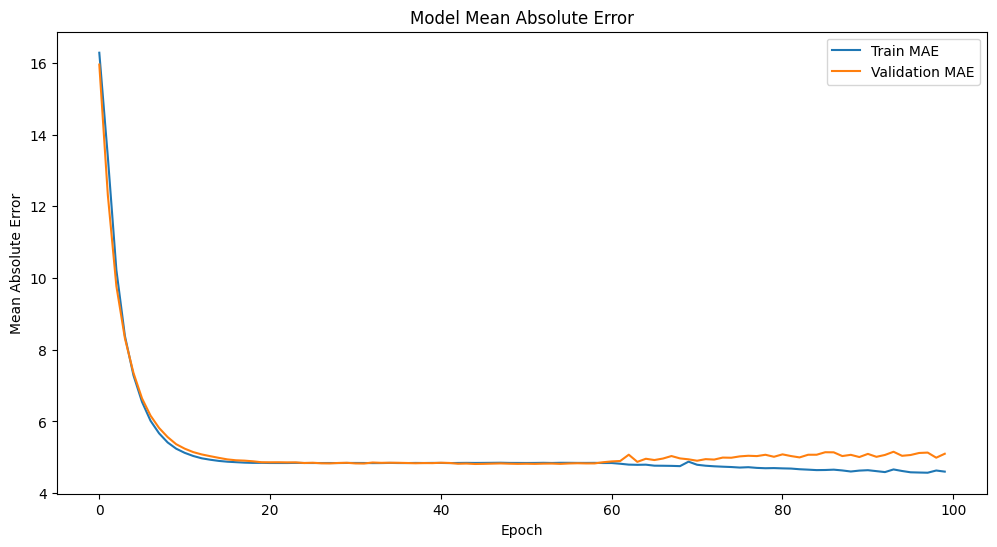

In [23]:
plt.figure(figsize=(12, 6))
plt.plot(history.history['mae'], label='Train MAE')
plt.plot(history.history['val_mae'], label='Validation MAE')
plt.title('Model Mean Absolute Error')
plt.xlabel('Epoch')
plt.ylabel('Mean Absolute Error')
plt.legend(loc='upper right')
plt.show()

In [24]:

# testeo aleatorio
sample_idx = 3

sample_X = X_test[sample_idx]
sample_y_true = y_test[sample_idx]

sample_X = sample_X.reshape(1, sample_X.shape[0], sample_X.shape[1])
sample_y_pred = model.predict(sample_X)

print("True Values:")
print(sample_y_true)
print("Predicted Values:")
print(sample_y_pred)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 206ms/step
True Values:
[23 35  7  8 21  9 19  8]
Predicted Values:
[[17.340975  38.203423  12.933522  16.955807  26.398874   3.8799956
  16.391125   7.9177494]]


testing manual input

In [30]:
manual_input = [[0, 0, 30],
              [0, 0, 45],
              [0, 1, 0],
              [ 0, 1, 15],
              [0, 1, 30]]
input_data = np.array(manual_input)

: 

In [26]:
manual_input_sequence = input_data.reshape((1, seq_length, 3))
predicted_traffic_counts = model.predict(manual_input_sequence)

print("Predicted traffic counts:", predicted_traffic_counts)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 210ms/step
Predicted traffic counts: [[ 7.0096707 16.705921   5.019726   8.153822  14.225456   4.6215105
   9.533791   5.63005  ]]


saving keras model ---- predicting from saved model.

In [27]:
model.save("2-intersection.keras")

In [28]:
loaded_model = keras.models.load_model("2-intersection.keras")

In [29]:
loaded_model.predict(manual_input_sequence)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 216ms/step


array([[ 7.0096707, 16.705921 ,  5.019726 ,  8.153822 , 14.225456 ,
         4.6215105,  9.533791 ,  5.63005  ]], dtype=float32)